In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('upload_best_geom_results.txt', header=0, sep="\t")
df.columns = ['Id', 'Embeddings', 'Projections', 'Lambda_c', 'Negative Count', 'Metric', 'Algorithm', 'Metric Algorithm', 'Score']

In [58]:
df.head()

,Id,Embeddings,Projections,Lambda_c,Negative Count,Metric,Algorithm,Metric Algorithm,Score
0,1,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.52950
1,2,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.54185
2,3,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.53833
3,4,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.54496
4,5,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.51091


In [51]:
#df_mrr = df.loc[(df.Metric=='MRR'), :]
#df_map = df.loc[(df.Metric=='MAP'), :]

<Figure size 864x576 with 0 Axes>

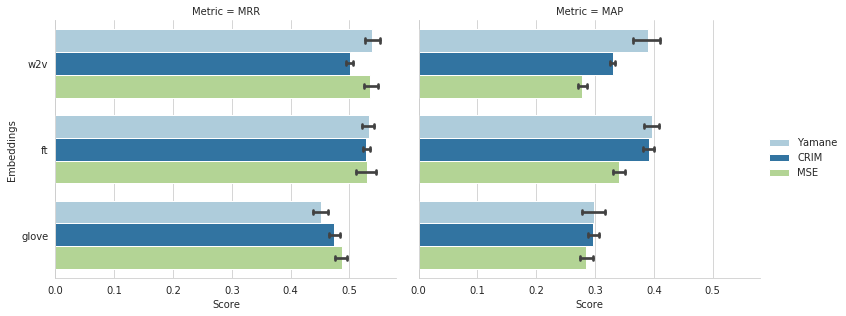

In [227]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(df, col="Metric", height=4.5, aspect=1.2, legend_out=True)
g = (g.map(sns.barplot, "Score", "Embeddings", "Algorithm", capsize=0.05,palette=pal, order=['w2v','ft','glove']).add_legend())


In [233]:
# compare CRIM results in terms of projections and negative count

crim_grid = pd.read_csv('upload_crim_grid.txt', header=0, sep="\t")
crim_grid.columns = ['Id', 'Method', 'Embeddings', 'Projections', 'Lambda', 'Negative Count', 'Metric', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']

In [240]:
crim_grid_mrr.head()

,Embeddings,Projections,Negative Count,Metric,variable,MRR Score
27,ft,1,1,MRR,Fold1,0.53408
28,ft,1,5,MRR,Fold1,0.53396
29,ft,1,10,MRR,Fold1,0.53397
30,ft,5,1,MRR,Fold1,0.51994
31,ft,5,5,MRR,Fold1,0.52839


In [235]:
crim_grid = pd.melt(crim_grid.reset_index(), id_vars=['Embeddings','Projections','Negative Count','Metric'], value_vars=['Fold1','Fold2','Fold3','Fold4','Fold5'])
crim_grid.rename(columns={'value':'Score'}, inplace=True)

In [239]:
#crim_grid_mrr = crim_grid.loc[crim_grid.Metric=='MRR']
crim_grid_mrr.rename(columns={'Score':'MRR Score'}, inplace=True)

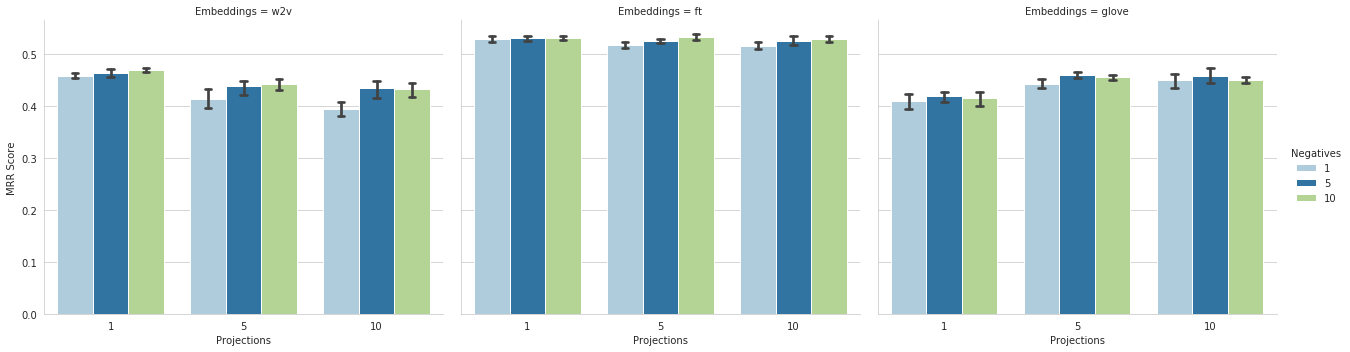

In [251]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(crim_grid_mrr, col="Embeddings", height=5, aspect=1.2, legend_out=True, col_order=['w2v','ft','glove'])
g = (g.map(sns.barplot, "Projections", "MRR Score", "Negative Count", capsize=0.05,palette=pal).add_legend(title="Negatives"))

In [243]:
#crim_grid_map = crim_grid.loc[crim_grid.Metric=='MAP']
crim_grid_map.rename(columns={'Score':'MAP Score'}, inplace=True)

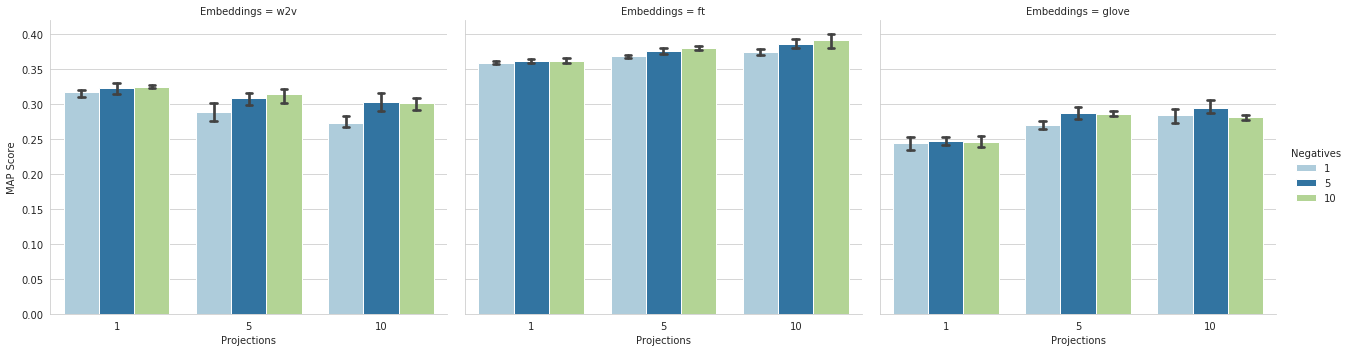

In [249]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(crim_grid_map, col="Embeddings", height=5, aspect=1.2, legend_out=True, col_order=['w2v','ft','glove'])
g = (g.map(sns.barplot, "Projections", "MAP Score", "Negative Count", capsize=0.05,palette=pal ).add_legend(title="Negatives"))

In [173]:
# import training data 

yamane_training = pd.read_csv('upload_training_stats.txt', header=0, sep="\t")
yamane_training.columns = ['Id', 'Embeddings', 'Lambda_c', 'Epoch', 'Clusters','Loss', 'MAP', 'MRR' ]

In [176]:
yamane_training.head()

,Id,Embeddings,Lambda_c,Epoch,Clusters,Loss,MAP,MRR
0,1,glove,0.16,1,2,0.41844,0.26425,0.42167
1,2,glove,0.16,2,3,0.36581,0.28907,0.43930
2,3,glove,0.16,3,4,0.36705,0.21400,0.38305
3,4,glove,0.16,4,5,0.35528,0.30545,0.45029
4,5,glove,0.16,5,6,0.34894,0.32540,0.46495


In [177]:
yamane_training = pd.melt(yamane_training.reset_index(), id_vars=['Embeddings','Epoch'], value_vars=['Clusters','Loss','MAP','MRR'])
yamane_training.rename(columns={'value':'Score','variable':'Score Type'}, inplace=True)

In [178]:
yamane_training_m = yamane_training[yamane_training['Score Type'].isin(['MRR','MAP'])]
yamane_training_c = yamane_training[yamane_training['Score Type'].isin(['Clusters'])]
yamane_training_c.rename(columns={'Score':'# Clusters'}, inplace=True)

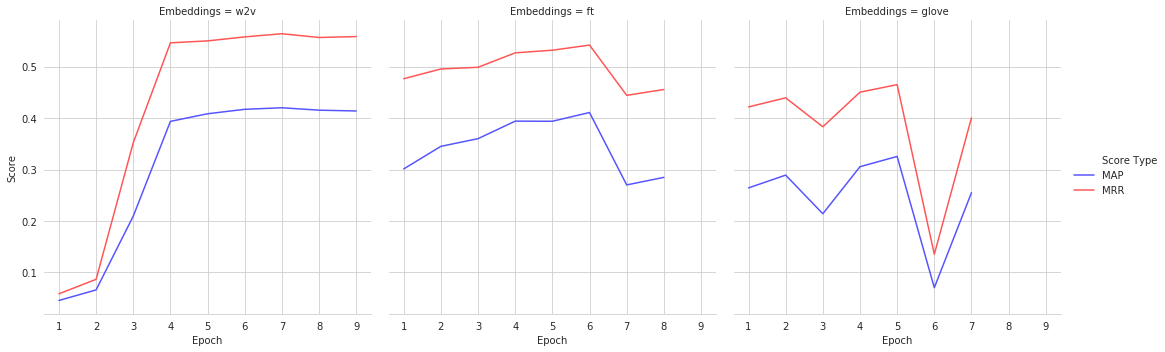

In [179]:
pal = sns.color_palette("seismic", n_colors=2)
g = sns.relplot(x="Epoch", y="Score", hue="Score Type", col="Embeddings", 
                col_order = ['w2v', 'ft', 'glove'], kind="line", 
                legend='full', data=yamane_training_m, palette=pal)
g.despine(left=True)

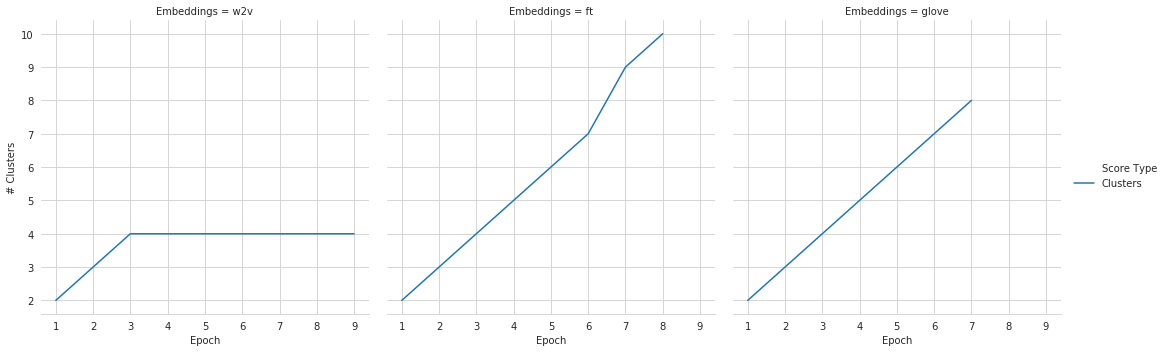

In [180]:
g = sns.relplot(x="Epoch", y="# Clusters", hue="Score Type", col="Embeddings", 
                col_order = ['w2v', 'ft', 'glove'], kind="line", 
                legend='full', data=yamane_training_c)
g.despine(left=True)

In [184]:
yamane_training = pd.read_csv('upload_training_stats_all.txt', header=0, sep="\t")
yamane_training.columns = ['Id', 'Fold', 'Embeddings', 'Epoch', 'Clusters','Loss', 'MAP', 'MRR' ]

In [201]:
yamane_training_m

,Fold,Embeddings,Epoch,Score Type,Score
204,1,glove,1,MAP,0.23716
205,1,glove,2,MAP,0.22347
206,1,glove,3,MAP,0.27423
207,1,glove,4,MAP,0.18464
208,1,glove,5,MAP,0.23266
216,3,glove,1,MAP,0.25839
217,3,glove,2,MAP,0.26681
218,3,glove,3,MAP,0.26463
219,3,glove,4,MAP,0.26726
220,3,glove,5,MAP,0.26884


In [186]:
yamane_training = pd.melt(yamane_training.reset_index(), id_vars=['Fold','Embeddings','Epoch'], value_vars=['Clusters','Loss','MAP','MRR'])
yamane_training.rename(columns={'value':'Score','variable':'Score Type'}, inplace=True)

In [199]:
# filte folds 1, 3 and 5 and only MRR and MAP
yamane_training_m = yamane_training.loc[(yamane_training.Fold.isin([1,3,5]) & 
                                         yamane_training['Score Type'].isin(['MRR','MAP'])),:]

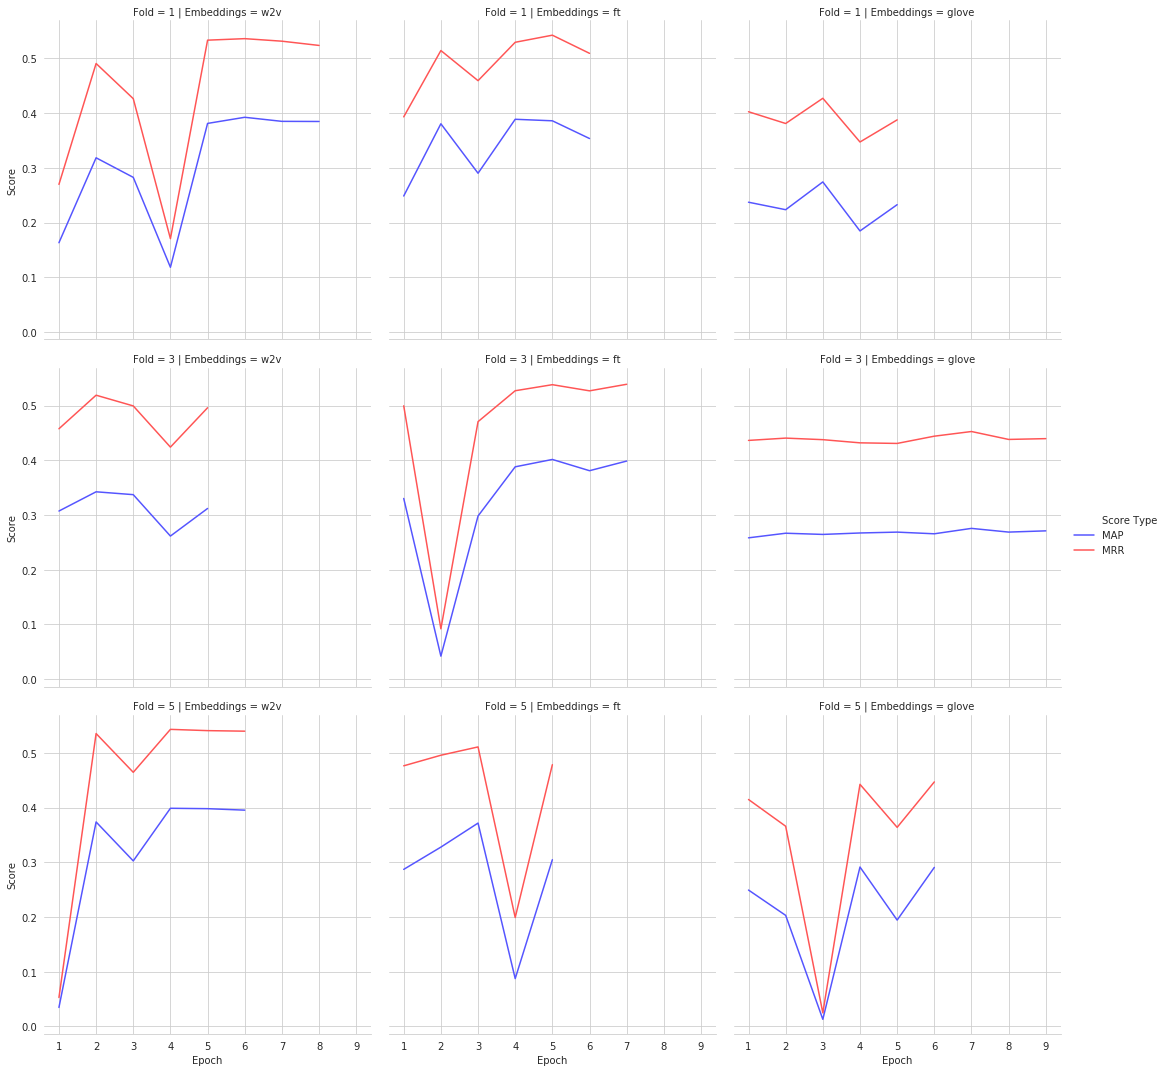

In [203]:
 pal = sns.color_palette("seismic", n_colors=2)
g = sns.relplot(x="Epoch", y="Score", hue="Score Type", col="Embeddings", row="Fold",
                col_order = ['w2v', 'ft', 'glove'], kind="line", 
                legend='full', data=yamane_training_m, palette=pal)
g.despine(left=True)

# CRIM SemEval Visuals

In [14]:
df = pd.read_csv('upload_crim_grid_both.txt', header=0, sep="\t")
df.columns = ['Id', 'Embeddings', 'Projections', 'Lambda_c', 'Negative Count', 'Metric', 'Score']

In [15]:
df.head()

,Id,Embeddings,Projections,Lambda_c,Negative Count,Metric,Score
0,1,ft,10,0,10,MRR,0.26486
1,2,ft,10,0,10,MAP,0.12594
2,6,ft,5,0,10,MRR,0.26660
3,7,ft,5,0,10,MAP,0.13268
4,11,ft,1,0,10,MRR,0.23312


/users/cborg/jfarrugia/py3_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


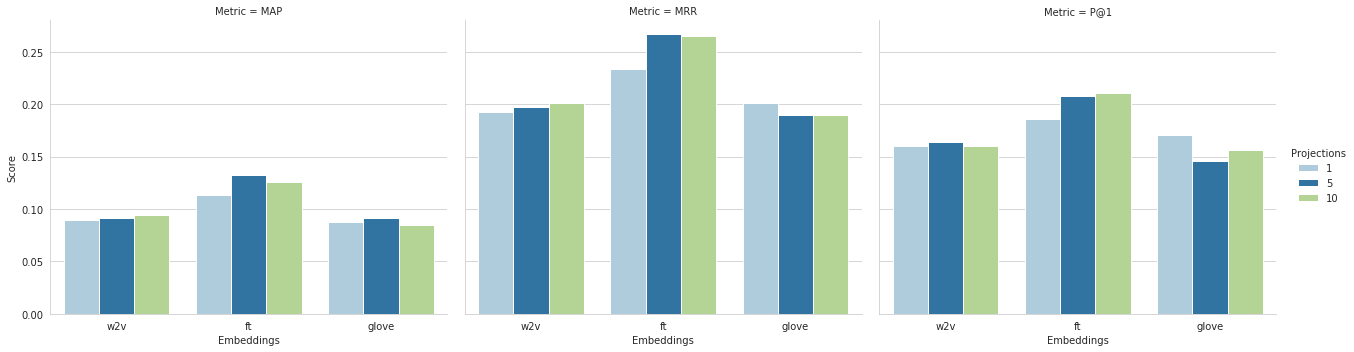

In [16]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(df, col="Metric", height=5, aspect=1.2, legend_out=True, col_order=['MAP','MRR', 'P@1'])
g = (g.map(sns.barplot, "Embeddings", "Score", "Projections",
           order=['w2v', 'ft','glove'],
           capsize=0.05,palette=pal ).add_legend(title="Projections"))

In [29]:
# Plot SemEval results, base model vs tuned 
df = pd.read_csv('upload_crim_base_vs_tuned.txt', header=0, sep="\t")

In [30]:
#df = df.loc[df.Metric.isin(['MRR', 'MAP']),]
df = df.loc[df.Metric.isin(['MAP']),]
#df.head()

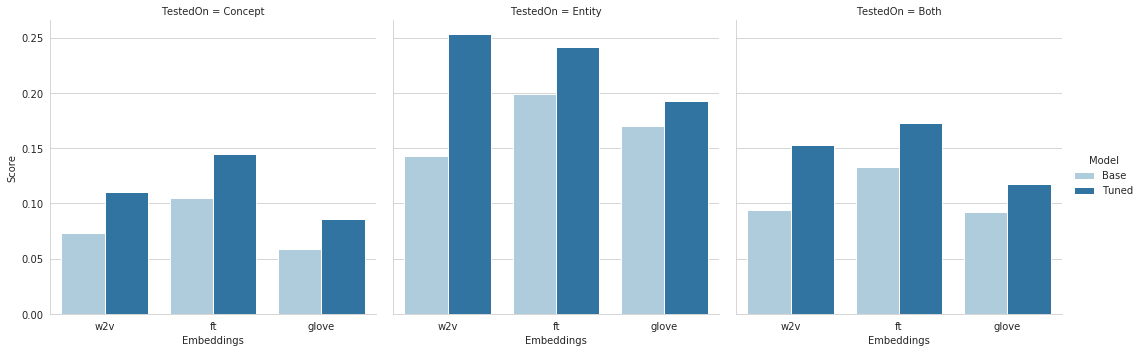

In [31]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")
sns.catplot(x="Embeddings", y="Score", hue="Model",
            #row="Metric", 
            col="TestedOn", data=df, 
            kind="bar", 
            palette=pal,
            col_order=['Concept','Entity','Both'],
            order=['w2v','ft','glove']
           )

In [45]:
# Plot my best results against official SemEval results
df = pd.read_csv('upload_jf_with_official.txt', header=0, sep="\t")

In [36]:
df = 
df.head()

,Model,TestedOn,Metric,Score
0,CRIM_JF_Frozen,Concept,MRR,0.21120
1,CRIM_JF_Tuned,Concept,MRR,0.28799
2,CRIM_Orig,Concept,MRR,0.30000
3,MFH,Concept,MRR,0.12500
4,MSCG_SANITY,Concept,MRR,0.19000


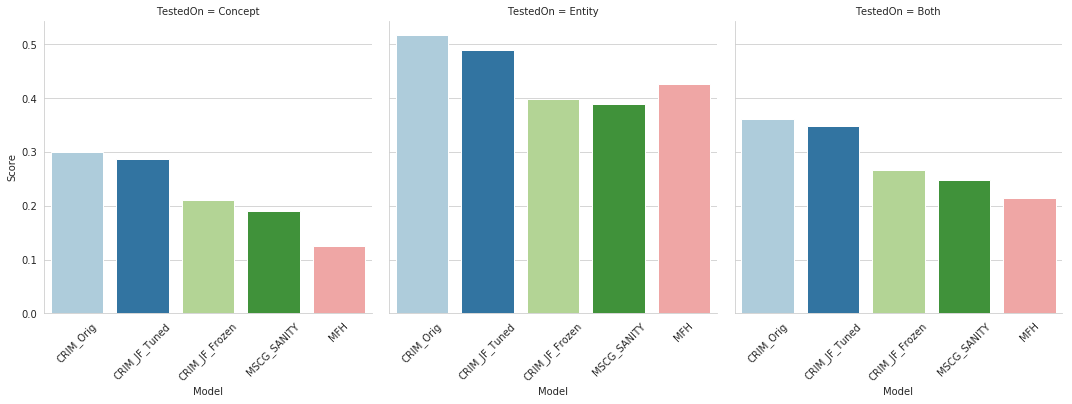

In [46]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")
g = sns.catplot(x="Model", y="Score", 
            #row="Metric", 
            col="TestedOn", data=df.loc[df.Metric == 'MRR',], 
            kind="bar", 
            palette=pal,
            col_order=['Concept','Entity','Both'],  
            order=['CRIM_Orig', 'CRIM_JF_Tuned', 'CRIM_JF_Frozen', 'MSCG_SANITY', 'MFH']
           )
g.set_xticklabels(['CRIM_Orig', 'CRIM_JF_Tuned', 'CRIM_JF_Frozen', 'MSCG_SANITY', 'MFH'], 
                  rotation = 45)#, ha="right")


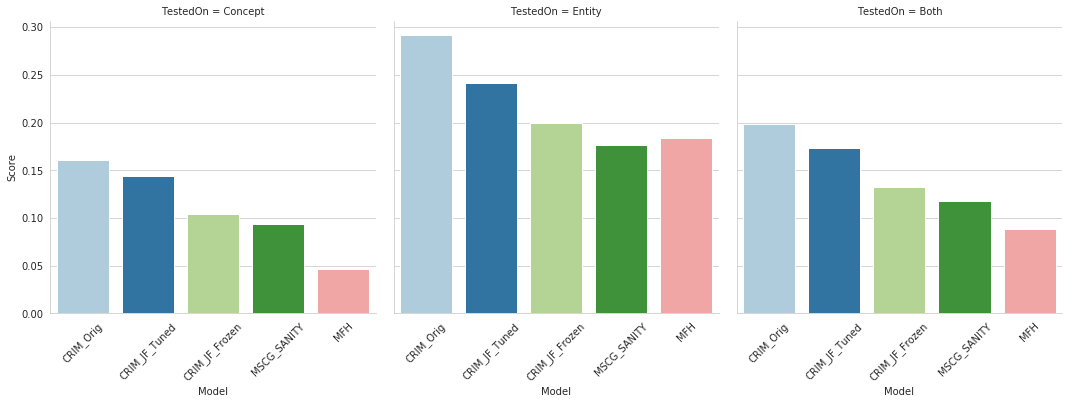

In [47]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")
g = sns.catplot(x="Model", y="Score", 
            #row="Metric", 
            col="TestedOn", data=df.loc[df.Metric == 'MAP',], 
            kind="bar", 
            palette=pal,
            col_order=['Concept','Entity','Both'],  
            order=['CRIM_Orig', 'CRIM_JF_Tuned', 'CRIM_JF_Frozen', 'MSCG_SANITY', 'MFH']
           )
g.set_xticklabels(['CRIM_Orig', 'CRIM_JF_Tuned', 'CRIM_JF_Frozen', 'MSCG_SANITY', 'MFH'], 
                  rotation = 45)#, ha="right")


# Scratch Pad

In [ ]:
#g = sns.barplot(x="Embeddings", y="Score", hue="Algorithm", data=df_mrr, palette=pal, 
            order = ['w2v','ft','glove'])
            #hue_order=["MRR-CRIM", "MRR-Yamane", "MAP-CRIM", "MAP-Yamane"])
g.set(ylabel='MRR 5-fold Mean Score')